# Preprocessing Task

- نفس عميق كوبايه شاي لان التاسك محتاجه مهندس بجد 
- هتلاقيني سايبلك الخرج بتاع كل سيل عشان لو عاوز تشيك علي حلك او تعرف الخرج بتاع كودك المفروض  شكله يبقي عامل ازاي 
- لو كودك صح ومطلع نتيجه مختلفه عن اللي انا مطلعها هراعي دا لا تقلق بس دي نادرا تحصل بس لو حصلت هيبقي خفيف وهراعي دا 
- التاسك دي هتنمي فيك مهاره السيرش يعني هتنميها ملهاش حل تاني 
### يلا بالتوفيق 

# Importing


In [223]:
# Import Needed Libraries
import numpy as np
import pandas as pd

In [224]:
# Read data and show first 5 rows 
data = pd.read_csv('house_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
# Data Shape ?
data.shape

(1460, 81)

In [226]:
# Data Info (Data Type of Each column) ?
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [227]:
# what the number of Numurical and Categorical Columns ?
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print(f"#Num_cols {len(numerical_columns)}")
print(f"#Cat_cols {len(categorical_columns)}")

#Num_cols 38
#Cat_cols 43


- <b> features to be removed ---> 80%  is nan 
- <b> features to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [228]:
# write function calculate the number of null values in each Feature (column) and 
# if null count is > 3% and < 80%  fill it by mean 
# if null count is < 3% remove this row that contain this null value 

def handle_null_values(df):
    null_counts = df.isnull().sum()
    null_percentage = data.isnull().mean() * 100
    
# Feature has 80% or higher null values drop Feature
    dropped_columns = null_percentage[null_percentage >= 80].index.tolist()
    df.drop(columns=dropped_columns, inplace=True)
    
# if null count is > 3% and < 80%  fill it by mean 
    filled_columns = null_percentage[(null_percentage > 3) & (null_percentage < 80)].index.tolist()
    for col in filled_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean())
            
# if null count is < 3% remove this row that contain this null value  
    dropped_rows = null_percentage[null_percentage <= 3].index.tolist()
    df.dropna(subset=dropped_rows, inplace=True)

    summary = pd.DataFrame({
        'count': null_counts[null_counts > 0]
    }).sort_values(by='count', ascending=False)
    
    print(summary)
    
    print(f"Dropped columns: {dropped_columns}")
    print(f"Filled columns: {filled_columns}")
    print(f"Dropped rows: {dropped_rows}")
    
    return df

cleaned_data = handle_null_values(data)


              count
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
Dropped columns: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Filled columns: ['LotFrontage', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
Dropped rows: ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExpo

# Redundant Handling

### Automated function for both categorical and numircal data

In [229]:
# write function to calculate the most redundant value in each column how many it repeated ?

def most_redundant_values(df):
    results = {}

    for col in df.columns:
        mode_values = df[col].mode()
        most_redundant_value = mode_values[0]
        count = (df[col] == most_redundant_value).sum()
        results[col] = count
        
    return results


results = most_redundant_values(data)
for key, value in results.items():
        print(f"{key}: {value}")

Id: 1
MSSubClass: 515
MSZoning: 1111
LotFrontage: 251
LotArea: 24
Street: 1406
LotShape: 886
LandContour: 1267
Utilities: 1411
LotConfig: 1015
LandSlope: 1335
Neighborhood: 215
Condition1: 1220
Condition2: 1397
BldgType: 1189
HouseStyle: 693
OverallQual: 381
OverallCond: 792
YearBuilt: 64
YearRemodAdd: 165
RoofStyle: 1103
RoofMatl: 1387
Exterior1st: 501
Exterior2nd: 491
MasVnrType: 438
MasVnrArea: 828
ExterQual: 871
ExterCond: 1239
Foundation: 633
BsmtQual: 648
BsmtCond: 1301
BsmtExposure: 944
BsmtFinType1: 426
BsmtFinSF1: 426
BsmtFinType2: 1246
BsmtFinSF2: 1246
BsmtUnfSF: 81
TotalBsmtSF: 35
Heating: 1386
HeatingQC: 725
CentralAir: 1331
Electrical: 1300
1stFlrSF: 25
2ndFlrSF: 796
LowQualFinSF: 1387
GrLivArea: 22
BsmtFullBath: 815
BsmtHalfBath: 1330
FullBath: 738
HalfBath: 872
BedroomAbvGr: 790
KitchenAbvGr: 1361
KitchenQual: 705
TotRmsAbvGrd: 393
Functional: 1322
Fireplaces: 657
FireplaceQu: 373
GarageType: 852
GarageYrBlt: 74
GarageFinish: 580
GarageCars: 793
GarageArea: 74
GarageQual

In [230]:
# if it repeated more than or equal 80% from data rows count remove the feature 
# Data row count = data.shape[0]
def redundant_values_to_drop(df, most_redundant_values):
    rows_count = df.shape[0]
    threshold = 0.8 * rows_count
    
    columns_to_remove = []

    for key, value in most_redundant_values.items():
        if value >= threshold:
            columns_to_remove.append(key)
            
    df.drop(columns=columns_to_remove, inplace=True)
    
    print(f"#drop {len(columns_to_remove)}")
    print(f"Dropped columns: {columns_to_remove}")
    
    
results = most_redundant_values(data)
redundant_values_to_drop(data, results)

#drop 29
Dropped columns: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


# Handling correlation between features

In [231]:
#calculate the correlation matrix  (note the correlation matrix just only for numirical features )
numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.010816,-0.012445,-0.034357,-0.031729,0.017332,-0.016396,-0.023834,-0.047418,-0.005680,...,0.026706,-0.017027,-0.003015,0.016094,0.018983,-0.029800,-0.005046,0.026508,-0.004209,-0.024651
MSSubClass,0.010816,1.000000,-0.360014,-0.138298,0.038952,-0.063240,0.032256,0.043906,0.023024,-0.067783,...,0.030657,-0.040128,0.077805,-0.034897,-0.094523,-0.014568,-0.005684,-0.016463,-0.026526,-0.082281
LotFrontage,-0.012445,-0.360014,1.000000,0.305272,0.232351,-0.054635,0.114914,0.078828,0.179330,0.215487,...,0.323671,0.235190,0.061672,0.269574,0.324954,0.075353,0.134402,0.005484,0.006464,0.333477
LotArea,-0.034357,-0.138298,0.305272,1.000000,0.104763,-0.002941,0.014163,0.010765,0.104010,0.213450,...,0.189107,0.268960,-0.025509,0.153812,0.180207,0.172281,0.083860,0.001070,-0.012886,0.264803
OverallQual,-0.031729,0.038952,0.232351,0.104763,1.000000,-0.121155,0.570266,0.540129,0.409656,0.211652,...,0.438254,0.392978,0.518553,0.607663,0.561612,0.230274,0.297678,0.064301,-0.024251,0.786765
OverallCond,0.017332,-0.063240,-0.054635,-0.002941,-0.121155,1.000000,-0.389624,0.057361,-0.134961,-0.057034,...,-0.058852,-0.030047,-0.318041,-0.193904,-0.163341,-0.013206,-0.041823,-0.008530,0.048668,-0.093567
YearBuilt,-0.016396,0.032256,0.114914,0.014163,0.570266,-0.389624,1.000000,0.593163,0.311745,0.242714,...,0.091792,0.143433,0.782055,0.536963,0.475678,0.225469,0.185426,0.008403,-0.014693,0.518736
YearRemodAdd,-0.023834,0.043906,0.078828,0.010765,0.540129,0.057361,0.593163,1.000000,0.172112,0.110541,...,0.189216,0.100277,0.619550,0.423161,0.369665,0.199144,0.218889,0.015944,0.029968,0.500266
MasVnrArea,-0.047418,0.023024,0.179330,0.104010,0.409656,-0.134961,0.311745,0.172112,1.000000,0.259291,...,0.283266,0.241914,0.247561,0.363992,0.370982,0.157566,0.124018,-0.009909,-0.005249,0.474525
BsmtFinSF1,-0.005680,-0.067783,0.215487,0.213450,0.211652,-0.057034,0.242714,0.110541,0.259291,1.000000,...,0.043425,0.250394,0.141906,0.215661,0.288913,0.196236,0.098352,-0.020850,0.020268,0.368849


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

In [232]:
def drop_corr_features(df, output_column, thresh=0.7):
    numerical_data = df.select_dtypes(include=['int64', 'float64']).drop(columns=[output_column], errors='ignore')
    
    corr_matrix = numerical_data.corr()
    
    highly_correlated_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thresh:
                highly_correlated_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))
    
    response_corr = df[numerical_data.columns].corrwith(df[output_column])

    columns_to_drop = set()
    for feature1, feature2 in highly_correlated_pairs:
        if abs(response_corr[feature1]) < abs(response_corr[feature2]):
            columns_to_drop.add(feature1)
        else:
            columns_to_drop.add(feature2)

    
    df = df.drop(columns=columns_to_drop)
    
    print(f"the columns are dropped are {columns_to_drop}")
    
    return df
    
    
output_column = 'SalePrice'
drop_corr_features(data, output_column)


the columns are dropped are {'GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF', 'GarageArea'}


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,NaN,Attchd,RFn,2,0,61,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,1,TA,Attchd,RFn,2,298,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,1,TA,Attchd,RFn,2,0,42,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,1,Gd,Detchd,Unf,3,0,35,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,1,TA,Attchd,RFn,3,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,...,1,TA,Attchd,RFn,2,0,40,8,2007,175000
1456,1457,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,...,2,TA,Attchd,Unf,2,349,0,2,2010,210000
1457,1458,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,...,2,Gd,Attchd,RFn,1,0,60,5,2010,266500
1458,1459,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,...,0,NaN,Attchd,Unf,1,366,0,4,2010,142125


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [233]:
# Write function to remove Outliers that above Upper band or below lower band for each column 
def remove_outliers_iqr(df):
    
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return cleaned_df

remove_outliers_iqr(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,...,Attchd,1999.0,RFn,2,460,0,40,8,2007,175000
1456,1457,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,...,Attchd,1978.0,Unf,2,500,349,0,2,2010,210000
1457,1458,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,...,Attchd,1941.0,RFn,1,252,0,60,5,2010,266500
1458,1459,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,...,Attchd,1950.0,Unf,1,240,366,0,4,2010,142125



# Skewness Handling
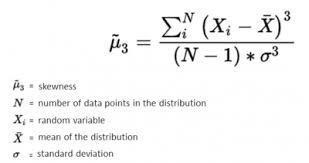


In [234]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
def calculate_skewness(df):
    skewness_dict = {}
    
    for col in df.select_dtypes(include=['int64', 'float64']).columns: 
        numerator = ((df[col] - df[col].mean()) ** 3).sum()

        N = df[col].count() 
        denominator = (N - 1) * ((df[col].std()) ** 3)

        if denominator != 0:
            skewness = numerator / denominator
        else:
            skewness = 0

        skewness_dict[col] = skewness

    return skewness_dict

skewness_values = calculate_skewness(data)
for key, value in skewness_values.items():
    print(f"{key}: {value}")

Id: 0.0073472455198464815
MSSubClass: 1.4141940178090493
LotFrontage: 2.3665468838229513
LotArea: 12.102529635580286
OverallQual: 0.255785540287413
OverallCond: 0.7148707095231703
YearBuilt: -0.6326637630299836
YearRemodAdd: -0.5287590120438941
MasVnrArea: 2.649692069796237
BsmtFinSF1: 1.6942301896197762
BsmtUnfSF: 0.9266174049936252
TotalBsmtSF: 2.160686494096881
1stFlrSF: 1.4005029160920588
2ndFlrSF: 0.7941498537781779
GrLivArea: 1.3869823272429722
BsmtFullBath: 0.5625538424248616
FullBath: 0.04103297834511108
HalfBath: 0.6439134516884495
BedroomAbvGr: 0.18914929496461527
TotRmsAbvGrd: 0.6986742186737454
Fireplaces: 0.6303726758493353
GarageYrBlt: -0.6861167566198949
GarageCars: -0.3166875325025744
GarageArea: 0.2027240176552314
WoodDeckSF: 1.5153696920505233
OpenPorchSF: 2.364335500517711
MoSold: 0.2093698459827723
YrSold: 0.10652061982371916
SalePrice: 1.893758353943306


# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [235]:
# Features that have absolute skewness > 1 do for it Log tranformation 
def log_transform(df, skewness_dict, thresh = 1):
    print("Features is log_Transformed : ")
    for col, skewness in skewness_dict.items():
        if abs(skewness) > thresh:
            df[col] = np.log1p(df[col])
            print(f"{col}")

skewness_values = calculate_skewness(data)
log_transform(data, skewness_values)

Features is log_Transformed : 
MSSubClass
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
GrLivArea
WoodDeckSF
OpenPorchSF
SalePrice


# Transform categorical features 

In [236]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [237]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Write code to transform each ordinal and nominal columns 
def label_encoder(df, ordinal_cats):
    for col in ordinal_cats:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

def one_hot_encoder(df, nominal_cats):
    OHE = OneHotEncoder(sparse_output = False, drop = 'first')
    one_hot_encoded = OHE.fit_transform(df[nominal_cats])

    OHE_df = pd.DataFrame(one_hot_encoded, columns = OHE.get_feature_names_out(nominal_cats))
    
    df = df.drop(columns = nominal_cats)
    df = pd.concat([df, OHE_df], axis=1)
    return df

data = label_encoder(data, ordinal_cats)

# Transform nominal features
data = one_hot_encoder(data, nominal_cats)

print("Transformed DataFrame:")
print(data.head())

# سيرشك الجميل بقي وشوف كل واحد بيطلع ايه وازاي هتلم الداتا بتاعتك معلش هتعبك معانا يا جميل 

Transformed DataFrame:
    Id  MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  OverallCond  \
0  1.0    4.110874     4.189655  9.042040       3.0          7.0          5.0   
1  2.0    3.044522     4.394449  9.169623       3.0          6.0          8.0   
2  3.0    4.110874     4.234107  9.328212       0.0          7.0          5.0   
3  4.0    4.262680     4.110874  9.164401       0.0          7.0          5.0   
4  5.0    4.110874     4.442651  9.565284       0.0          8.0          5.0   

   YearBuilt  YearRemodAdd MasVnrType  ...  Neighborhood_SawyerW  \
0     2003.0        2003.0    BrkFace  ...                   0.0   
1     1976.0        1976.0        NaN  ...                   0.0   
2     2001.0        2002.0    BrkFace  ...                   0.0   
3     1915.0        1970.0        NaN  ...                   0.0   
4     2000.0        2000.0    BrkFace  ...                   0.0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0          

# Transform Numerical features 
> I want you to apply only Min-Max Scaling for all numerical columns

In [238]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
def minmax_scaler(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

scaled_data = minmax_scaler(data)
print(scaled_data.head())

         Id  MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  \
0  0.000000    0.483003     0.413268  0.366271       1.0     0.666667   
1  0.000685    0.000000     0.490307  0.391245       1.0     0.555556   
2  0.001371    0.483003     0.429990  0.422289       0.0     0.666667   
3  0.002056    0.551764     0.383633  0.390223       0.0     0.666667   
4  0.002742    0.483003     0.508439  0.468694       0.0     0.777778   

   OverallCond  YearBuilt  YearRemodAdd MasVnrType  ...  Neighborhood_SawyerW  \
0        0.500   0.949275      0.883333    BrkFace  ...                   0.0   
1        0.875   0.753623      0.433333        NaN  ...                   0.0   
2        0.500   0.934783      0.866667    BrkFace  ...                   0.0   
3        0.500   0.311594      0.333333        NaN  ...                   0.0   
4        0.500   0.927536      0.833333    BrkFace  ...                   0.0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0   

In [239]:
# print Your final data frame here 
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan
0,0.000000,0.483003,0.413268,0.366271,1.0,0.666667,0.500,0.949275,0.883333,BrkFace,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000685,0.000000,0.490307,0.391245,1.0,0.555556,0.875,0.753623,0.433333,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.483003,0.429990,0.422289,0.0,0.666667,0.500,0.934783,0.866667,BrkFace,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.551764,0.383633,0.390223,0.0,0.666667,0.500,0.311594,0.333333,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.002742,0.483003,0.508439,0.468694,0.0,0.777778,0.500,0.927536,0.833333,BrkFace,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## End 
## لو وصلت لهنا بالسلامه تبقي تنين وتاخد 5 بونص و5 كمان لو كان حلك كله تمام 